In [1173]:
# *********************************************************************************************************************
# * @Assignment: Machine Learning 1 : Lead Scoring Case study
# *********************************************************************************************************************
# *
# * @author    : Poonam Yadav
# * @version   : v0.1.1
# * @StartDate : 09-Mar-2020
# 
# *********************************************************************************************************************

### Steps/Approach

In [1174]:
# ********************************************************************************************************************* 
# * 1. Importing required libraries
# * 2. Data Reading
# * 3. Data understanding 
# * 4. Data cleansing 
# * 5. Data Preparation
# * 6. Model building
# * 7. Final observations

In [1175]:
# *********************************************************************************************************************
# * Suppress Warnings
# *********************************************************************************************************************
import warnings
warnings.filterwarnings('ignore')

### 1. Importing Libraries

In [1176]:
# *********************************************************************************************************************
# * Import Libraries 
# *********************************************************************************************************************
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [1177]:
# *********************************************************************************************************************
# To Scale our data
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

#Model building
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan


#display setting
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 200)

 
# *********************************************************************************************************************

### 2. Data Reading

In [1178]:
# *********************************************************************************************************************
# * Loading Data frames
# *********************************************************************************************************************
Lead_score= pd.read_csv ('Leads.csv')
Lead_score_backup= Lead_score

### 3. Data Understanding

In [1179]:
Lead_score.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.00,0,0.00,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.00,674,2.50,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.00,20.00,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.00,17.00,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.00,18.00,No,No,Modified


In [1180]:
Lead_score.shape

(9240, 37)

In [1181]:
Lead_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [1182]:
Lead_score.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.00,9240.00,9103.00,9240.00,9103.00,5022.00,5022.00
mean,617188.44,0.39,3.45,487.70,2.36,14.31,16.34
std,23406.00,0.49,4.85,548.02,2.16,1.39,1.81
min,579533.00,0.00,0.00,0.00,0.00,7.00,11.00
25%,596484.50,0.00,1.00,12.00,1.00,14.00,15.00
50%,615479.00,0.00,3.00,248.00,2.00,14.00,16.00
75%,637387.25,1.00,5.00,936.00,3.00,15.00,18.00
max,660737.00,1.00,251.00,2272.00,55.00,18.00,20.00


### 4. Data Cleansing

In [1183]:
# Checking for duplicate rows in the dataset
Lead_score.loc[Lead_score.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


In [1184]:
#Conclusion: no duplicates found

Replacing 'select' with a null value . The customer did not make a selection here from the given options therefore this value
is as good as null value 

In [1185]:
Lead_score = Lead_score.replace('Select', np.nan)

Computing the % of null values in each column

In [1186]:
# % of null values
round(100*(Lead_score.isnull().sum()/len(Lead_score.index)), 2)


Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                         26.63
Specialization                                  36.58
How did you hear about X Education              78.46
What is your current occupation                 29.11
What matters most to you in choosing a course   29.32
Search                                           0.00
Magazine                                         0.00
Newspaper Article           

**Treating NULL Values**
- Delete columns with Null Values more than 70%
- Deal with columns with Null Values between 20-40% manually
- Drop the other columns based on further analysis 

In [1187]:
Lead_score = Lead_score.drop(Lead_score.loc[:,list(round(100*(Lead_score.isnull().sum()/len(Lead_score.index)), 2)>70)].columns, 1)

In [1188]:
round(100*(Lead_score.isnull().sum()/len(Lead_score.index)), 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                         26.63
Specialization                                  36.58
What is your current occupation                 29.11
What matters most to you in choosing a course   29.32
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

**Lets look at the following columns with Null Values >20%**

Country                                         
Specialization                                   
What is your current occupation                  
What matters most to you in choosing a course    
Tags                                             
Lead Quality                                    
City                                             
Asymmetrique Activity Index                     
Asymmetrique Profile Index                      
Asymmetrique Activity Score                     
Asymmetrique Profile Score                      

***1. Country :***                                                                                                                   
As most of the leads are from India , Computing values in Country column to simplify the data by dividing the data into India and outside India; and replacing the null values with 'India'

In [1189]:
Lead_score['Country'] = Lead_score['Country'].apply(lambda x: 'India' if x=='India' else 'Outside India')
Lead_score['Country'].value_counts()

India            6492
Outside India    2748
Name: Country, dtype: int64

In [1190]:
Lead_score['Country'].isnull().sum()

0

In [1191]:
Lead_score.loc[pd.isnull(Lead_score['Country']), ['Country']] = 'India'

In [1192]:
Lead_score['Country'].isnull().sum()

0

***2. Specialization***

In [1193]:
Lead_score['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Media and Advertising                203
Travel and Tourism                   203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [1194]:
# Lets check the number of null values in this column
Lead_score['Specialization'].isnull().sum()

3380

In [1195]:
# Since the amount of null values is high , Lets compute the null values and replace them with text 'Unknown'
Lead_score['Specialization'].fillna("Unknown", inplace = True)
Lead_score['Specialization'].value_counts()

Unknown                              3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

***3. What is your current occupation***

In [1196]:
Lead_score['What is your current occupation'].isnull().sum()

2690

In [1197]:
Lead_score['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [1198]:
Lead_score['What is your current occupation'].fillna("Unknown", inplace = True)
Lead_score['What is your current occupation'].value_counts()

Unemployed              5600
Unknown                 2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

***4. What matters most to you in choosing a course***

In [1199]:
Lead_score['What matters most to you in choosing a course'].isnull().sum()

2709

In [1200]:
Lead_score['What matters most to you in choosing a course'].unique()

array(['Better Career Prospects', nan, 'Flexibility & Convenience',
       'Other'], dtype=object)

In [1201]:
# Since this column does not give away a lot of information and mostly are null or 'other' we can drop the column
Lead_score = Lead_score.drop('What matters most to you in choosing a course' , axis= 1)

***5.Tags***                                                                                                       
Tags assigned to customers indicating the current status of the lead.

In [1202]:
Lead_score['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [1203]:
# This column does not add much value to the analysis , hence dropping it. 
Lead_score = Lead_score.drop('Tags',axis =1)

***6. Lead Quality***

Lead Quality - Indicates the quality of lead based on the data and intuition of the employee who has been assigned to the lead.

In [1204]:
Lead_score['Lead Quality'].unique()

array(['Low in Relevance', nan, 'Might be', 'Not Sure', 'Worst',
       'High in Relevance'], dtype=object)

Lead quality column has 5 unique values except null values, lets check what are those and how usefull are they for further analysis.

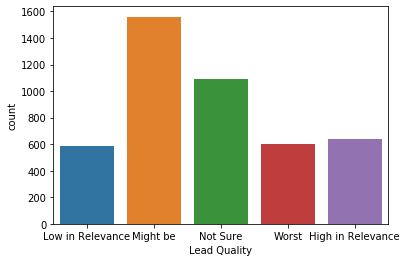

In [1205]:
sns.countplot(Lead_score['Lead Quality'])

In [1206]:
# Here all the null values are as good as not sure.

Lead_score['Lead Quality'] = Lead_score['Lead Quality'].replace(np.nan, 'Not Sure')

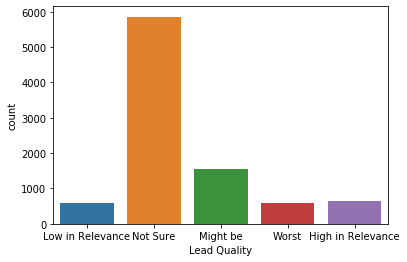

In [1207]:
sns.countplot(Lead_score['Lead Quality'])
    

***7. City***

We will compute the null values in city column by replacing them with 'Unknown" because we do not want to loose any data computing it any other way

In [1208]:
Lead_score['City'].fillna("unknown",inplace = True)
Lead_score['City'].value_counts()

unknown                        3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

***8.Asymmetrique Activity Index***                                                                       
***9.Asymmetrique Profile Index***                                                                          
***10.Asymmetrique Activity Score***                                                                             
***11.Asymmetrique Profile Score***

- An index and score assigned to each customer based on their activity and their profile.                                    
- We can get rid of Asymmetrique Activity Score and Asymmetrique Profile Score as we can look at the index columns for the corresponding information

In [1209]:
Lead_score = Lead_score.drop(['Asymmetrique Activity Score', 'Asymmetrique Profile Score'], axis=1)

Lets replace the null values in Asymmetrique Activity Index and Asymmetrique Profile Index with 'Unknown'

In [1210]:
Lead_score['Asymmetrique Activity Index'].fillna("Unknown", inplace = True)
Lead_score['Asymmetrique Activity Index'].value_counts()
Lead_score['Asymmetrique Profile Index'].fillna("Unknown", inplace = True)
Lead_score['Asymmetrique Profile Index'].value_counts()

Unknown      4218
02.Medium    2788
01.High      2203
03.Low         31
Name: Asymmetrique Profile Index, dtype: int64

We will not look at rest of the columns and see which ones will add value to our analysis and which ones can be dropped from the data set.

In [1211]:
print(Lead_score.columns)

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
       'Newspaper', 'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')


In [1212]:
print(Lead_score['Magazine'].value_counts())
print(Lead_score['Receive More Updates About Our Courses'].value_counts())
print(Lead_score['Update me on Supply Chain Content'].value_counts())
print(Lead_score['I agree to pay the amount through cheque'].value_counts())


No    9240
Name: Magazine, dtype: int64
No    9240
Name: Receive More Updates About Our Courses, dtype: int64
No    9240
Name: Update me on Supply Chain Content, dtype: int64
No    9240
Name: I agree to pay the amount through cheque, dtype: int64


In [1213]:
# Since the above columns have only 1 unique value they do not add any value to the data , let's drop them and all similar
# columns from the data 

In [1214]:
Lead_score= Lead_score.loc[:,Lead_score.nunique()!=1]

In [1215]:
# Prospect ID gives out the same information as Lead Number , therefore we can drop it from  the dataset 
Lead_score = Lead_score.drop('Prospect ID' , axis=1)

In [1216]:
print(Lead_score.columns)

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'Lead Quality',
       'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')


***Checking the % of null values after all the computations***

In [1217]:
round(100*(Lead_score.isnull().sum()/len(Lead_score.index)), 2)

Lead Number                              0.00
Lead Origin                              0.00
Lead Source                              0.39
Do Not Email                             0.00
Do Not Call                              0.00
Converted                                0.00
TotalVisits                              1.48
Total Time Spent on Website              0.00
Page Views Per Visit                     1.48
Last Activity                            1.11
Country                                  0.00
Specialization                           0.00
What is your current occupation          0.00
Search                                   0.00
Newspaper Article                        0.00
X Education Forums                       0.00
Newspaper                                0.00
Digital Advertisement                    0.00
Through Recommendations                  0.00
Lead Quality                             0.00
City                                     0.00
Asymmetrique Activity Index       

In [1218]:
print(Lead_score['Do Not Email'].value_counts())
print(Lead_score['Do Not Call'].value_counts())
print(Lead_score['Search'].value_counts())
print(Lead_score['Through Recommendations'].value_counts())
print(Lead_score['A free copy of Mastering The Interview'].value_counts())
print(Lead_score['Newspaper Article'].value_counts())
print(Lead_score['X Education Forums'].value_counts())
print(Lead_score['Newspaper'].value_counts())
print(Lead_score['Digital Advertisement'].value_counts())

No     8506
Yes     734
Name: Do Not Email, dtype: int64
No     9238
Yes       2
Name: Do Not Call, dtype: int64
No     9226
Yes      14
Name: Search, dtype: int64
No     9233
Yes       7
Name: Through Recommendations, dtype: int64
No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64
No     9238
Yes       2
Name: Newspaper Article, dtype: int64
No     9239
Yes       1
Name: X Education Forums, dtype: int64
No     9239
Yes       1
Name: Newspaper, dtype: int64
No     9236
Yes       4
Name: Digital Advertisement, dtype: int64


In [1219]:
# Since these columns do not give away any specific information we can drop these columns .
Lead_score = Lead_score.drop(columns =['Do Not Email' , 'Do Not Call' , 'Search' ,'Through Recommendations' ,'A free copy of Mastering The Interview','Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement'],axis=1)

In [1220]:
Lead_score.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'Lead Quality', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Last Notable Activity'],
      dtype='object')

In [1221]:
Lead_score.shape

(9240, 16)

In [1222]:
# Lets drop rows with null values
Lead_score= Lead_score.dropna()

In [1223]:
round(100*(Lead_score.isnull().sum()/len(Lead_score.index)), 2)

Lead Number                       0.00
Lead Origin                       0.00
Lead Source                       0.00
Converted                         0.00
TotalVisits                       0.00
Total Time Spent on Website       0.00
Page Views Per Visit              0.00
Last Activity                     0.00
Country                           0.00
Specialization                    0.00
What is your current occupation   0.00
Lead Quality                      0.00
City                              0.00
Asymmetrique Activity Index       0.00
Asymmetrique Profile Index        0.00
Last Notable Activity             0.00
dtype: float64

### 6. Model Building

In [1224]:
# Creating dummy variables for categorial variables

categorical_columns = ['Lead Origin' ,'Country','Lead Quality' ,'Lead Source','Last Activity' , 'Specialization' , 'What is your current occupation'
                                       ,'City' ,'Last Notable Activity' ,'Asymmetrique Activity Index' , 'Asymmetrique Profile Index']

for x in categorical_columns:
    cont = pd.get_dummies(Lead_score[x],prefix=x,drop_first=True)
    Lead_score = pd.concat([Lead_score,cont],axis=1)


In [1225]:
Lead_score.shape

(9074, 111)

In [1226]:
print(Lead_score.columns)

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization',
       ...
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed',
       'Last Notable Activity_View in browser link Clicked',
       'Asymmetrique Activity Index_02.Medium',
       'Asymmetrique Activity Index_03.Low',
       'Asymmetrique Activity Index_Unknown',
       'Asymmetrique Profile Index_02.Medium',
       'Asymmetrique Profile Index_03.Low',
       'Asymmetrique Profile Index_Unknown'],
      dtype='object', length=111)


In [1227]:
Lead_score.head(1)

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Lead Quality,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Country_Outside India,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unknown,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_unknown,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Asymmetrique Activity Index_02.Medium,Asymmetrique Activity Index_03.Low,Asymmetrique Activity Index_Unknown,Asymmetrique Profile Index_02.Medium,Asymmetrique Profile Index_03.Low,Asymmetrique Profile Index_Unknown
0,660737,API,Olark Chat,0,0.00,0,0.00,Page Visited on Website,Outside India,Unknown,Unemployed,Low in Relevance,unknown,02.Medium,02.Medium,Modified,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0


In [1228]:
#dropping the original columns we created dummies for 
Lead_score = Lead_score.drop(columns = ['Lead Origin' ,'Country','Lead Quality' ,'Lead Source','Last Activity' , 'Specialization' , 'What is your current occupation'
                                       ,'City' ,'Last Notable Activity' ,'Asymmetrique Activity Index' , 'Asymmetrique Profile Index'] , axis =1)


In [1229]:
Lead_score.shape

(9074, 100)

In [1230]:
Lead_score.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Country_Outside India,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unknown,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_unknown,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Asymmetrique Activity Index_02.Medium,Asymmetrique Activity Index_03.Low,Asymmetrique Activity Index_Unknown,Asymmetrique Profile Index_02.Medium,Asymmetrique Profile Index_03.Low,Asymmetrique Profile Index_Unknown
0,660737,0,0.00,0,0.00,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
1,660728,0,5.00,674,2.50,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,660727,1,2.00,1532,2.00,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,660719,0,1.00,305,1.00,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,660681,1,2.00,1428,1.

In [1231]:
#checking for outliers 
outlier_check = Lead_score[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]


In [1232]:
outlier_check.describe(percentiles=[.01,.1,.2,.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.00,9074.00,9074.00
mean,3.46,482.89,2.37
std,4.86,545.26,2.16
min,0.00,0.00,0.00
1%,0.00,0.00,0.00
10%,0.00,0.00,0.00
20%,0.00,0.00,0.00
25%,1.00,11.00,1.00
50%,3.00,246.00,2.00
75%,5.00,922.75,3.20


In [1233]:
Q1 = Lead_score['Page Views Per Visit'].quantile(0.25)
Q3 = Lead_score['Page Views Per Visit'].quantile(0.75)
IQR = Q3 - Q1
Lead_score=Lead_score.loc[(Lead_score['Page Views Per Visit'] >= Q1 - 1.5*IQR) & (Lead_score['Page Views Per Visit'] <= Q3 + 1.5*IQR)]

In [1234]:
Q1 = Lead_score['TotalVisits'].quantile(0.25)
Q3 = Lead_score['TotalVisits'].quantile(0.75)
IQR = Q3 - Q1
Lead_score=Lead_score.loc[(Lead_score['TotalVisits'] >= Q1 - 1.5*IQR) & (Lead_score['TotalVisits'] <= Q3 + 1.5*IQR)]

In [1235]:
Q1 = Lead_score['Total Time Spent on Website'].quantile(0.25)
Q3 = Lead_score['Total Time Spent on Website'].quantile(0.75)
IQR = Q3 - Q1
Lead_score=Lead_score.loc[(Lead_score['Total Time Spent on Website'] >= Q1 - 1.5*IQR) & (Lead_score['Total Time Spent on Website'] <= Q3 + 1.5*IQR)]

#### *Test-Train split*

In [1236]:
X = Lead_score.drop(['Lead Number','Converted'], axis=1)

X.head()


,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Country_Outside India,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unknown,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_unknown,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Asymmetrique Activity Index_02.Medium,Asymmetrique Activity Index_03.Low,Asymmetrique Activity Index_Unknown,Asymmetrique Profile Index_02.Medium,Asymmetrique Profile Index_03.Low,Asymmetrique Profile Index_Unknown
0,0.00,0,0.00,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
1,5.00,674,2.50,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,2.00,1532,2.00,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1.00,305,1.00,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,2.00,1428,1.00,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,

In [1237]:
y = Lead_score['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [1238]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [1239]:
#scaling continuous variables
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Country_Outside India,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unknown,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_unknown,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Asymmetrique Activity Index_02.Medium,Asymmetrique Activity Index_03.Low,Asymmetrique Activity Index_Unknown,Asymmetrique Profile Index_02.Medium,Asymmetrique Profile Index_03.Low,Asymmetrique Profile Index_Unknown
6358,0.19,1.61,0.57,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
5658,-1.25,-0.86,-1.25,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
5086,-1.25,-0.86,-1.25,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
3738,0.19,0.61,0.57,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
4711,1.15,-0.22,0.27,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0

In [1240]:
converted = (sum(Lead_score['Converted'])/len(Lead_score['Converted'].index))*100
converted

37.21297533714008

In [1241]:
# Almost 37% conversion rate 

In [1242]:
#Logistic regression model
logistics = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logistics.fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5761
Model:                            GLM   Df Residuals:                     5669
Model Family:                Binomial   Df Model:                           91
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 09 Mar 2020   Deviance:                          nan
Time:                        19:04:01   Pearson chi2:                 5.62e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                 1.003e+16   1.26e+08   7.93e+07      0.000       1e+16       1e+16
TotalVisits                                           2.362e+14   1.73e+06   1.37e+08      0.000    2.36e+14    2.36e+14
Total Time Spent on Website                           7.314e+14   1.07e+06   6.83e+08      0.000    7.31e+14    7.31e+14
Page Views Per Visit                                 -2.797e+14   1.73e+06  -1.62e+08      0.000    -2.8e+14    -2.8e+14
Lead Origin_Landing Page Submission                  -4.255e+14   4.37e+06  -9.73e+07      0.000   -4.25e+14   -4.25e+14
Lead Origin_Lead Add Form                             2.107e+14   6.77e+07   3.11e+06      0.000    2.11e+14    2.11e+14
Lead Origin_Lead Import                               4.118e+15   6.94e+07   5.93e+07      0.000    4.12e+15    4.12e+15
Country_Outside India                                 8.102e+13   4.37e+06   1.85e+07      0.000     8.1e+13     8.1e+13
Lead Quality_Low in Relevance                        -3.865e+14   5.19e+06  -7.44e+07      0.000   -3.87e+14   -3.87e+14
Lead Quality_Might be                                 -1.27e+15   4.54e+06   -2.8e+08      0.000   -1.27e+15   -1.27e+15
Lead Quality_Not Sure                                 5.278e+13   4.32e+06   1.22e+07      0.000    5.28e+13    5.28e+13
Lead Quality_Worst                                   -9.962e+14    5.5e+06  -1.81e+08      0.000   -9.96e+14   -9.96e+14
Lead Source_Direct Traffic                           -5.224e+15   9.53e+07  -5.48e+07      0.000   -5.22e+15   -5.22e+15
Lead Source_Facebook                                 -9.005e+15   1.17e+08   -7.7e+07      0.000      -9e+15      -9e+15
Lead Source_Google                                   -5.029e+15   9.53e+07  -5.28e+07      0.000   -5.03e+15   -5.03e+15
Lead Source_Live Chat                                -4.572e+14   9.52e+07   -4.8e+06      0.000   -4.57e+14   -4.57e+14
Lead Source_NC_EDM                                   -1.207e+15   1.17e+08  -1.03e+07      0.000   -1.21e+15   -1.21e+15
Lead Source_Olark Chat                               -4.784e+15   9.54e+07  -5.01e+07      0.000   -4.78e+15   -4.78e+15
Lead Source_Organic Search                           -5.066e+15   9.54e+07  -5.31e+07      0.000   -5.07e+15   -5.07e+15
Lead Source_Pay per Click Ads                        -8.892e+15   1.17e+08  -7.61e+07      0.000   -8.89e+15   -8.89e+15
Lead Source_Press_Release                            -7.712e+15   1.17e+08  -6.59e+07      0.000   -7.71e+15   -7.71e+15
Lead Source_Reference                                -4.309e+15   6.74e+07  -6.39e+07      0.000   -4.31e+15   -4.31e+15
Lead Source_Referral Sites                            -5.1

Feature selection using RFE

In [1243]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [1244]:
  # running RFE with 20 variables as output
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)           
rfe = rfe.fit(X_train, y_train)

In [1245]:
rfe.support_

array([False,  True, False, False,  True, False, False,  True,  True,
        True,  True, False, False, False, False,  True,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False,  True,  True, False, False,  True, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False,  True,
       False, False, False,  True, False, False, False, False])

In [1246]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 15),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 14),
 ('Lead Origin_Landing Page Submission', False, 6),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 49),
 ('Country_Outside India', False, 16),
 ('Lead Quality_Low in Relevance', True, 1),
 ('Lead Quality_Might be', True, 1),
 ('Lead Quality_Not Sure', True, 1),
 ('Lead Quality_Worst', True, 1),
 ('Lead Source_Direct Traffic', False, 35),
 ('Lead Source_Facebook', False, 17),
 ('Lead Source_Google', False, 40),
 ('Lead Source_Live Chat', False, 65),
 ('Lead Source_NC_EDM', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 39),
 ('Lead Source_Pay per Click Ads', False, 52),
 ('Lead Source_Press_Release', False, 71),
 ('Lead Source_Reference', False, 7),
 ('Lead Source_Referral Sites', False, 18),
 ('Lead Source_Social Media', False, 2),
 ('Lead Source_WeLearn', False, 78),
 ('Lead Source_Welingak Website', True, 1

In [1247]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Country_Outside India', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Converted to Lead', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opened',
       'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_Unrea

In [1248]:
cols = X_train.columns[rfe.support_]

Assessing with statsModels

In [1249]:
X_train_sm = sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5761
Model:                            GLM   Df Residuals:                     5740
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1898.8
Date:                Mon, 09 Mar 2020   Deviance:                       3797.7
Time:                        19:04:11   Pearson chi2:                 5.49e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    2.0239      0.256      7.902      0.000       1.522       2.526
Total Time Spent on Website                              1.0566      0.048     22.124      0.000       0.963       1.150
Lead Origin_Lead Add Form                                2.3615      0.244      9.684      0.000       1.884       2.839
Lead Quality_Low in Relevance                           -1.1981      0.297     -4.033      0.000      -1.780      -0.616
Lead Quality_Might be                                   -2.2722      0.271     -8.369      0.000      -2.804      -1.740
Lead Quality_Not Sure                                   -3.7594      0.262    -14.367      0.000      -4.272      -3.247
Lead Quality_Worst                                      -5.9174      0.434    -13.645      0.000      -6.767      -5.067
Lead Source_NC_EDM                                      26.0025   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
Lead Source_Olark Chat                                   1.6559      0.124     13.332      0.000       1.412       1.899
Lead Source_Welingak Website                            24.0882   1.24e+04      0.002      0.998   -2.42e+04    2.42e+04
Last Activity_Email Bounced                             -1.4979      0.430     -3.487      0.000      -2.340      -0.656
Last Activity_Had a Phone Conversation                   1.2759      0.934      1.367      0.172      -0.554       3.106
Last Activity_Olark Chat Conversation                   -0.9622      0.197     -4.879      0.000      -1.349      -0.576
Last Activity_SMS Sent                                   1.2326      0.091     13.588      0.000       1.055       1.410
Specialization_E-COMMERCE                                0.8189      0.349      2.345      0.019       0.135       1.503
What is your current occupation_Housewife               23.6216   4.21e+04      0.001      1.000   -8.24e+04    8.24e+04
What is your current occupation_Unknown                 -0.6160      0.104     -5.948      0.000      -0.819      -0.413
What is your current occupation_Working Professional     1.6997      0.224      7.598      0.000       1.261       2.138
Last Notable Activity_Modified                          -0.6830      0.098     -6.996      0.000      -0.874      -0.492
Last Notable Activity_Unreachable                        2.1707      0.771      2.816      0.005       0.660       3.682
Asymmetrique Activity Index_03.Low                      -2.2739      0.342     -6.641      0.000      -2.945      -1.603
========================================================================================================================
"""

In [1250]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1251]:
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Quality_Not Sure,2.93
15,What is your current occupation_Unknown,2.02
17,Last Notable Activity_Modified,1.88
7,Lead Source_Olark Chat,1.83
12,Last Activity_SMS Sent,1.77
3,Lead Quality_Might be,1.76
1,Lead Origin_Lead Add Form,1.61
11,Last Activity_Olark Chat Conversation,1.59
16,What is your current occupation_Working Profes...,1.38
8,Lead Source_Welingak Website,1.36


We can see that there not a lot of multicollinearity present in our model , lets plot a heat map and check the correlation matrix

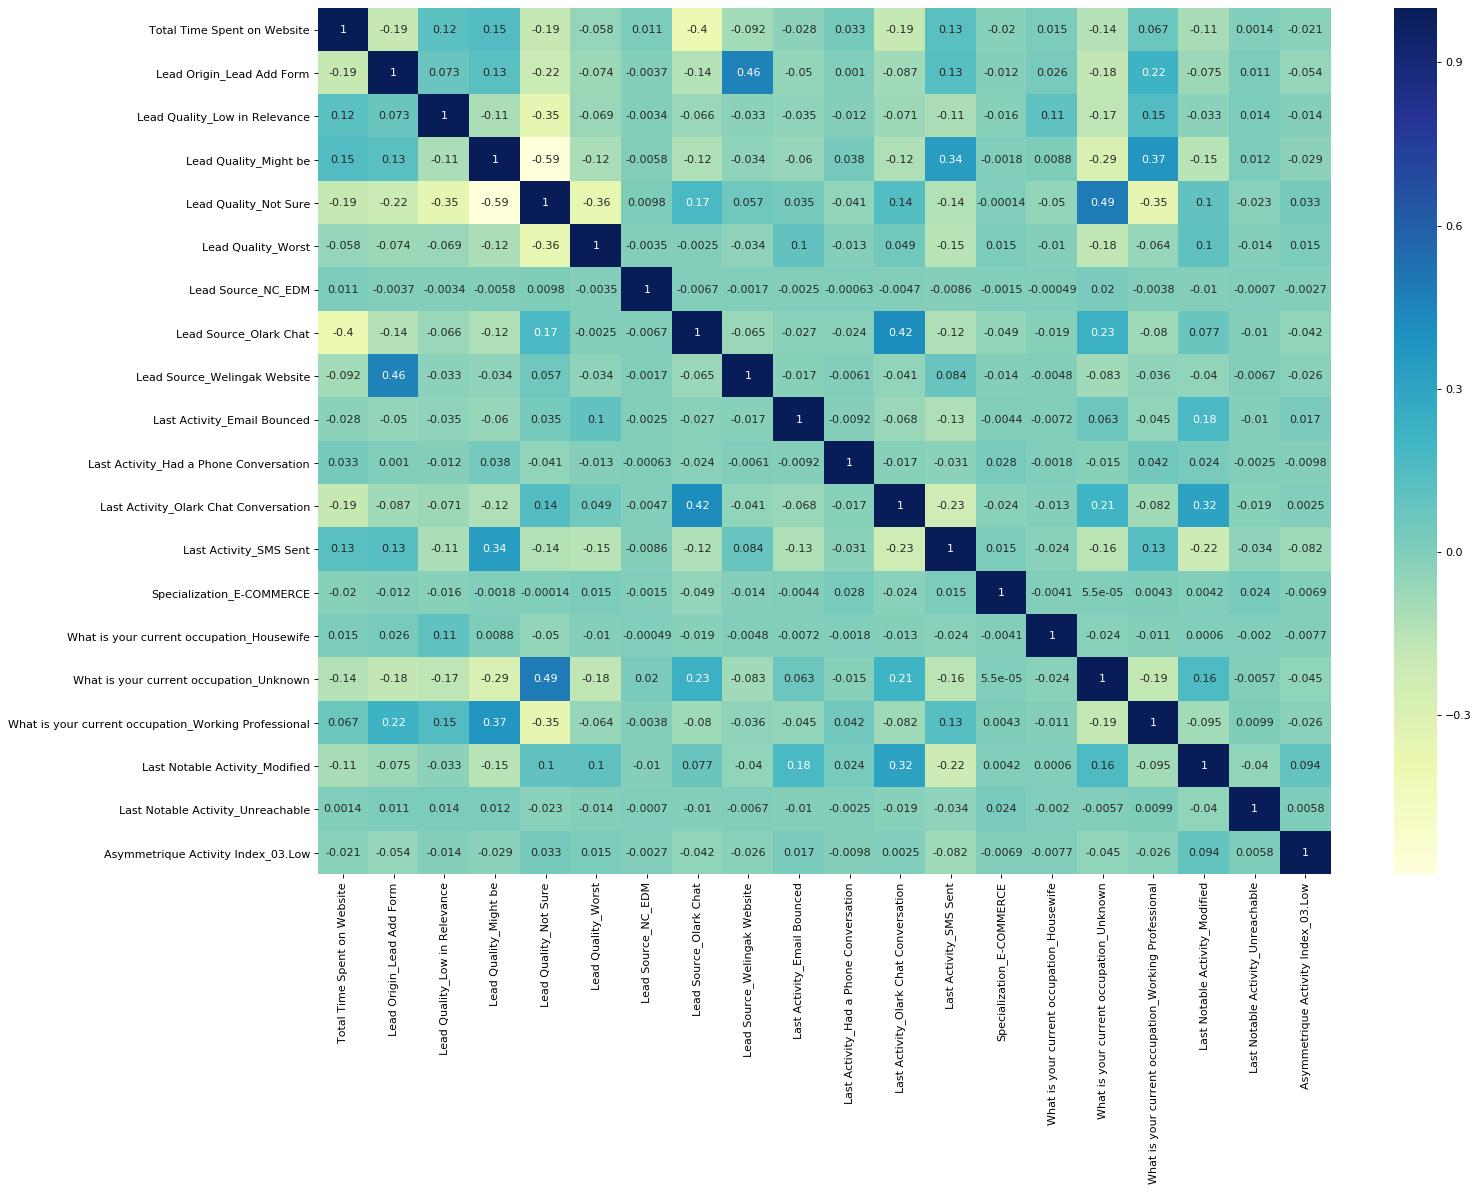

In [1252]:
plt.figure(figsize=(20,15), dpi=80, facecolor='w', edgecolor='k', frameon='True')

cor = X_train[cols].corr()
sns.heatmap(cor, annot=True, cmap="YlGnBu")

plt.tight_layout()
plt.show()

In [1253]:
#lets drop the variables with high VIF

In [1254]:
cols = cols.drop('Lead Quality_Not Sure' , 1)

In [1255]:
X_train_sm = sm.add_constant(X_train[cols])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5761
Model:                            GLM   Df Residuals:                     5741
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2084.8
Date:                Mon, 09 Mar 2020   Deviance:                       4169.7
Time:                        19:04:21   Pearson chi2:                 5.49e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2472      0.076    -16.508      0.000      -1.395      -1.099
Total Time Spent on Website                              1.0801      0.045     23.785      0.000       0.991       1.169
Lead Origin_Lead Add Form                                3.4285      0.232     14.748      0.000       2.973       3.884
Lead Quality_Low in Relevance                            1.9835      0.175     11.361      0.000       1.641       2.326
Lead Quality_Might be                                    1.0136      0.113      8.930      0.000       0.791       1.236
Lead Quality_Worst                                      -2.6358      0.357     -7.386      0.000      -3.335      -1.936
Lead Source_NC_EDM                                      25.9089   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
Lead Source_Olark Chat                                   1.5645      0.117     13.332      0.000       1.334       1.794
Lead Source_Welingak Website                            22.8154   1.28e+04      0.002      0.999   -2.52e+04    2.52e+04
Last Activity_Email Bounced                             -1.6660      0.406     -4.103      0.000      -2.462      -0.870
Last Activity_Had a Phone Conversation                   1.7335      0.828      2.094      0.036       0.111       3.356
Last Activity_Olark Chat Conversation                   -1.0531      0.191     -5.526      0.000      -1.427      -0.680
Last Activity_SMS Sent                                   1.0714      0.086     12.463      0.000       0.903       1.240
Specialization_E-COMMERCE                                0.7244      0.335      2.165      0.030       0.069       1.380
What is your current occupation_Housewife               23.4884   4.08e+04      0.001      1.000      -8e+04    8.01e+04
What is your current occupation_Unknown                 -1.0310      0.099    -10.447      0.000      -1.224      -0.838
What is your current occupation_Working Professional     1.8632      0.215      8.655      0.000       1.441       2.285
Last Notable Activity_Modified                          -0.6251      0.092     -6.820      0.000      -0.805      -0.445
Last Notable Activity_Unreachable                        2.2344      0.731      3.057      0.002       0.802       3.667
Asymmetrique Activity Index_03.Low                      -2.1198      0.327     -6.479      0.000      -2.761      -1.479
========================================================================================================================
"""

In [1256]:
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Lead Source_Olark Chat,1.74
16,Last Notable Activity_Modified,1.69
3,Lead Quality_Might be,1.62
1,Lead Origin_Lead Add Form,1.61
10,Last Activity_Olark Chat Conversation,1.59
11,Last Activity_SMS Sent,1.51
14,What is your current occupation_Unknown,1.50
15,What is your current occupation_Working Profes...,1.38
0,Total Time Spent on Website,1.35
7,Lead Source_Welingak Website,1.34


In [1257]:
cols = cols.drop('Lead Source_Olark Chat' , 1)

In [1258]:
X_train_sm = sm.add_constant(X_train[cols])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5761
Model:                            GLM   Df Residuals:                     5742
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2175.9
Date:                Mon, 09 Mar 2020   Deviance:                       4351.9
Time:                        19:04:22   Pearson chi2:                 5.51e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9091      0.067    -13.536      0.000      -1.041      -0.777
Total Time Spent on Website                              0.8179      0.038     21.334      0.000       0.743       0.893
Lead Origin_Lead Add Form                                2.9173      0.227     12.834      0.000       2.472       3.363
Lead Quality_Low in Relevance                            1.9721      0.171     11.539      0.000       1.637       2.307
Lead Quality_Might be                                    0.9409      0.110      8.569      0.000       0.726       1.156
Lead Quality_Worst                                      -2.5590      0.350     -7.314      0.000      -3.245      -1.873
Lead Source_NC_EDM                                      25.6617   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
Lead Source_Welingak Website                            22.7945   1.29e+04      0.002      0.999   -2.53e+04    2.54e+04
Last Activity_Email Bounced                             -1.6190      0.399     -4.057      0.000      -2.401      -0.837
Last Activity_Had a Phone Conversation                   1.5624      0.796      1.964      0.050       0.003       3.122
Last Activity_Olark Chat Conversation                   -0.5012      0.186     -2.696      0.007      -0.866      -0.137
Last Activity_SMS Sent                                   1.0494      0.083     12.593      0.000       0.886       1.213
Specialization_E-COMMERCE                                0.3893      0.324      1.200      0.230      -0.247       1.025
What is your current occupation_Housewife               23.3393   4.17e+04      0.001      1.000   -8.17e+04    8.17e+04
What is your current occupation_Unknown                 -0.8949      0.096     -9.337      0.000      -1.083      -0.707
What is your current occupation_Working Professional     1.8636      0.211      8.813      0.000       1.449       2.278
Last Notable Activity_Modified                          -0.7005      0.089     -7.883      0.000      -0.875      -0.526
Last Notable Activity_Unreachable                        1.8767      0.700      2.682      0.007       0.505       3.248
Asymmetrique Activity Index_03.Low                      -2.1971      0.319     -6.890      0.000      -2.822      -1.572
========================================================================================================================
"""

In [1259]:
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,Last Notable Activity_Modified,1.69
3,Lead Quality_Might be,1.62
1,Lead Origin_Lead Add Form,1.58
10,Last Activity_SMS Sent,1.47
13,What is your current occupation_Unknown,1.41
14,What is your current occupation_Working Profes...,1.38
9,Last Activity_Olark Chat Conversation,1.37
6,Lead Source_Welingak Website,1.34
0,Total Time Spent on Website,1.17
2,Lead Quality_Low in Relevance,1.13


In [1260]:
cols = cols.drop('Last Notable Activity_Modified' , 1)

In [1261]:
X_train_sm = sm.add_constant(X_train[cols])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5761
Model:                            GLM   Df Residuals:                     5743
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2207.9
Date:                Mon, 09 Mar 2020   Deviance:                       4415.9
Time:                        19:04:23   Pearson chi2:                 5.59e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0927      0.063    -17.252      0.000      -1.217      -0.969
Total Time Spent on Website                              0.8076      0.038     21.276      0.000       0.733       0.882
Lead Origin_Lead Add Form                                2.8520      0.225     12.696      0.000       2.412       3.292
Lead Quality_Low in Relevance                            1.9215      0.169     11.391      0.000       1.591       2.252
Lead Quality_Might be                                    0.9330      0.109      8.575      0.000       0.720       1.146
Lead Quality_Worst                                      -2.6331      0.349     -7.545      0.000      -3.317      -1.949
Lead Source_NC_EDM                                      25.9313   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
Lead Source_Welingak Website                            22.8727   1.29e+04      0.002      0.999   -2.52e+04    2.53e+04
Last Activity_Email Bounced                             -1.8668      0.391     -4.770      0.000      -2.634      -1.100
Last Activity_Had a Phone Conversation                   1.2648      0.797      1.586      0.113      -0.298       2.827
Last Activity_Olark Chat Conversation                   -0.8073      0.182     -4.445      0.000      -1.163      -0.451
Last Activity_SMS Sent                                   1.1136      0.082     13.538      0.000       0.952       1.275
Specialization_E-COMMERCE                                0.3454      0.319      1.082      0.279      -0.280       0.971
What is your current occupation_Housewife               23.2287   4.24e+04      0.001      1.000    -8.3e+04    8.31e+04
What is your current occupation_Unknown                 -0.9719      0.095    -10.224      0.000      -1.158      -0.786
What is your current occupation_Working Professional     1.8643      0.211      8.834      0.000       1.451       2.278
Last Notable Activity_Unreachable                        2.1006      0.701      2.998      0.003       0.727       3.474
Asymmetrique Activity Index_03.Low                      -2.2463      0.310     -7.241      0.000      -2.854      -1.638
========================================================================================================================
"""

In [1262]:
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Quality_Might be,1.61
1,Lead Origin_Lead Add Form,1.57
10,Last Activity_SMS Sent,1.47
14,What is your current occupation_Working Profes...,1.38
6,Lead Source_Welingak Website,1.34
13,What is your current occupation_Unknown,1.27
9,Last Activity_Olark Chat Conversation,1.21
0,Total Time Spent on Website,1.17
2,Lead Quality_Low in Relevance,1.11
7,Last Activity_Email Bounced,1.06


In [1263]:
cols = cols.drop('Lead Quality_Might be',1)

In [1264]:
X_train_sm = sm.add_constant(X_train[cols])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5761
Model:                            GLM   Df Residuals:                     5744
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2245.6
Date:                Mon, 09 Mar 2020   Deviance:                       4491.2
Time:                        19:04:24   Pearson chi2:                 5.86e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9334      0.059    -15.696      0.000      -1.050      -0.817
Total Time Spent on Website                              0.8287      0.038     21.994      0.000       0.755       0.903
Lead Origin_Lead Add Form                                2.8475      0.223     12.779      0.000       2.411       3.284
Lead Quality_Low in Relevance                            1.7230      0.168     10.250      0.000       1.393       2.052
Lead Quality_Worst                                      -2.8381      0.349     -8.134      0.000      -3.522      -2.154
Lead Source_NC_EDM                                      25.9722   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
Lead Source_Welingak Website                            22.7217   1.28e+04      0.002      0.999   -2.52e+04    2.52e+04
Last Activity_Email Bounced                             -1.8723      0.393     -4.761      0.000      -2.643      -1.102
Last Activity_Had a Phone Conversation                   1.4069      0.779      1.806      0.071      -0.120       2.934
Last Activity_Olark Chat Conversation                   -0.7868      0.180     -4.365      0.000      -1.140      -0.434
Last Activity_SMS Sent                                   1.2491      0.080     15.609      0.000       1.092       1.406
Specialization_E-COMMERCE                                0.3413      0.319      1.071      0.284      -0.283       0.966
What is your current occupation_Housewife               23.5305   4.12e+04      0.001      1.000   -8.06e+04    8.07e+04
What is your current occupation_Unknown                 -1.1904      0.092    -12.939      0.000      -1.371      -1.010
What is your current occupation_Working Professional     2.2362      0.204     10.986      0.000       1.837       2.635
Last Notable Activity_Unreachable                        2.1874      0.688      3.178      0.001       0.838       3.537
Asymmetrique Activity Index_03.Low                      -2.2464      0.312     -7.211      0.000      -2.857      -1.636
========================================================================================================================
"""

In [1265]:
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,1.56
5,Lead Source_Welingak Website,1.33
12,What is your current occupation_Unknown,1.25
9,Last Activity_SMS Sent,1.21
13,What is your current occupation_Working Profes...,1.21
8,Last Activity_Olark Chat Conversation,1.20
0,Total Time Spent on Website,1.15
2,Lead Quality_Low in Relevance,1.09
6,Last Activity_Email Bounced,1.06
3,Lead Quality_Worst,1.05


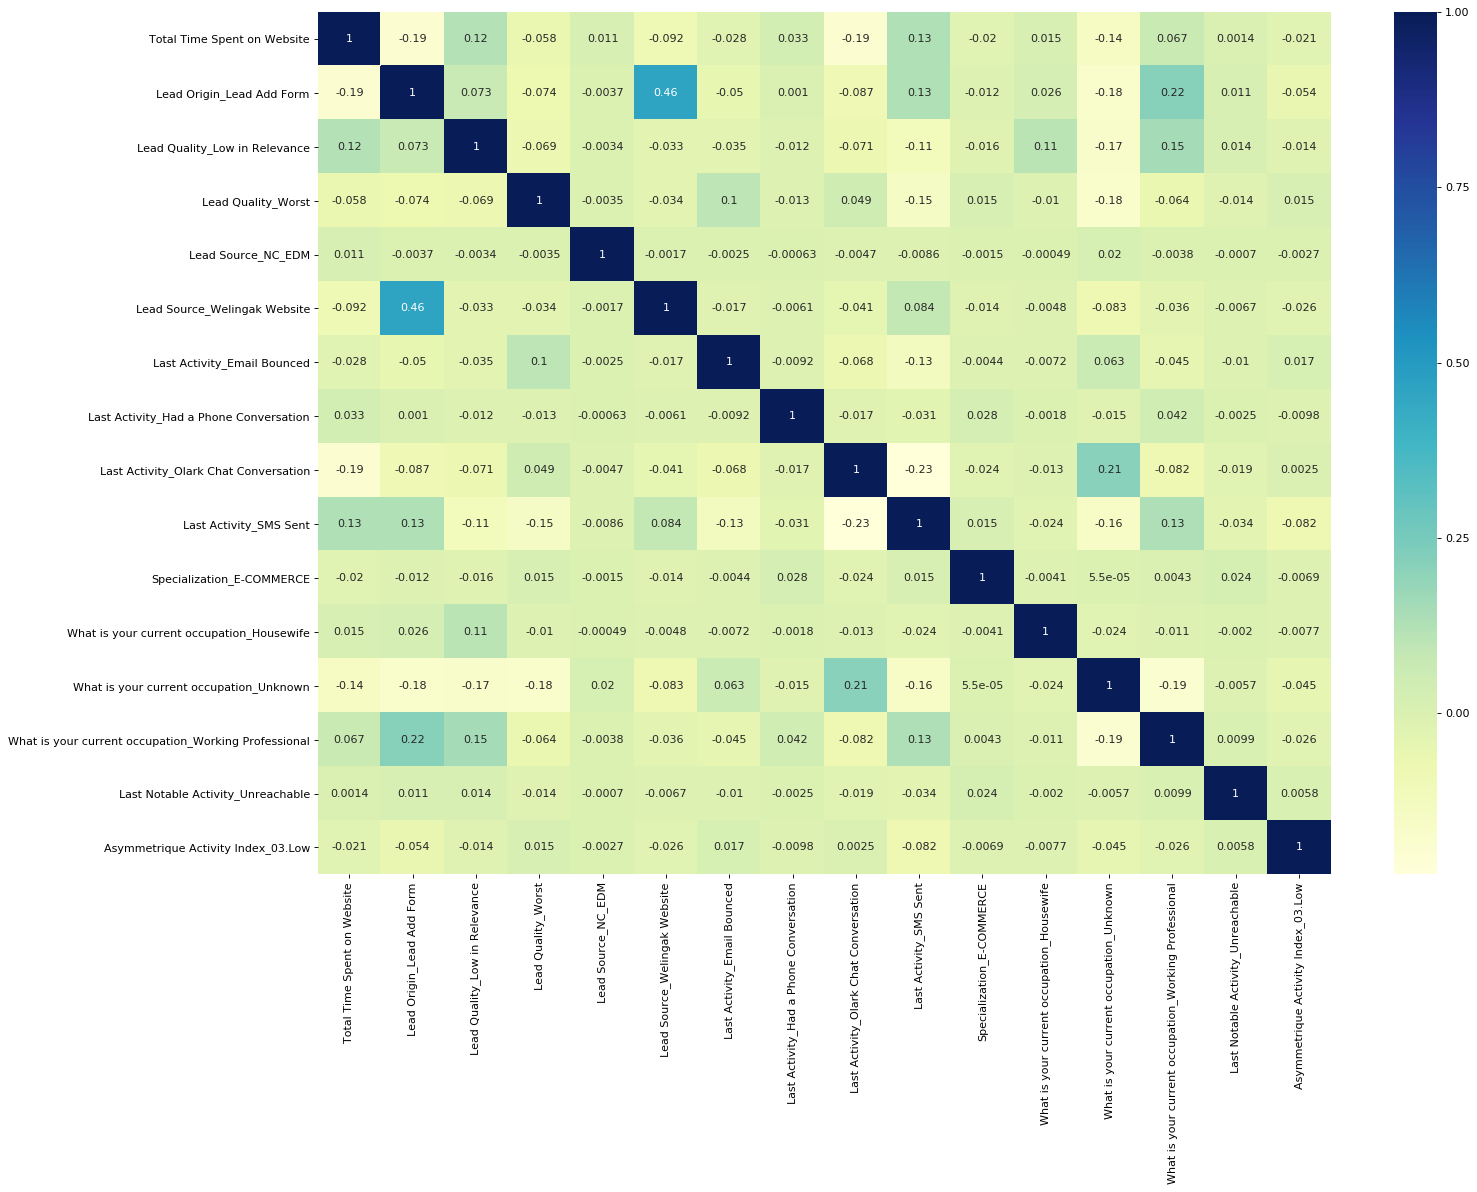

In [1266]:
plt.figure(figsize=(20,15), dpi=80, facecolor='w', edgecolor='k', frameon='True')

cor = X_train[cols].corr()
sns.heatmap(cor, annot=True, cmap="YlGnBu")

plt.tight_layout()
plt.show()

In [1267]:
# This shows now we have very less multi-collinearity compared to earlier Heatmap

In [1268]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

6358   0.60
5658   0.06
5086   0.03
3738   0.04
4711   0.25
8963   0.23
147    0.05
4141   0.40
3101   0.22
3364   0.03
dtype: float64

In [1269]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.59854961, 0.05530482, 0.02596218, 0.03675094, 0.24656508,
       0.2252306 , 0.04924706, 0.40166815, 0.22309083, 0.02596218])

In [1270]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID
0,0,0.60,6358
1,0,0.06,5658
2,0,0.03,5086
3,0,0.04,3738
4,0,0.25,4711


Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0

In [1271]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)


In [1272]:
y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted
0,0,0.60,6358,1
1,0,0.06,5658,0
2,0,0.03,5086,0
3,0,0.04,3738,0
4,0,0.25,4711,0


In [1273]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)


[[3182  422]
 [ 648 1509]]


In [1274]:
# Accuracy 
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8142683561881617


In [1275]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [1276]:
# Sensitivity
TP / float(TP+FN)

0.6995827538247567

In [1277]:
# Specificity
TN / float(TN+FP)


0.8829078801331853

In [1278]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

# positive predictive value 
print (TP / float(TP+FP))

# Negative predictive value
print (TN / float(TN+ FN))

0.11709211986681466
0.781460383221129
0.8308093994778067


### Plotting ROC Curve                                                                                                       
An ROC curve demonstrates several things:                                                                                      
• It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).                                                                                                          
• The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.       
• The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [1279]:
def plot_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr,tpr, thresholds

In [1280]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

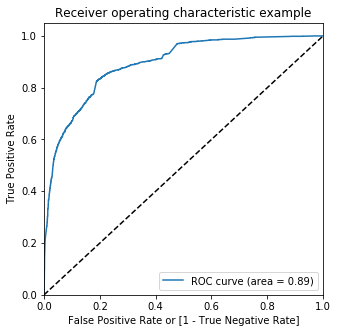

(array([0.        , 0.        , 0.        , ..., 0.99944506, 0.99972253,
        1.        ]),
 array([0.00000000e+00, 4.63606861e-04, 9.27213723e-04, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]),
 array([2.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        1.08670149e-03, 5.42380613e-04, 2.32207557e-04]))

In [1281]:
plot_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

### Calculate area under the curve

In [1282]:
def roc_auc(fpr,tpr):
    AreaUnderCurve = 0.
    for i in range(len(fpr)-1):
        AreaUnderCurve += (fpr[i+1]-fpr[i]) * (tpr[i+1]+tpr[i])
    AreaUnderCurve *= 0.5
    return AreaUnderCurve

In [1283]:
auc = roc_auc(fpr,tpr)
auc

0.8927087787380944

An AUC can be classified as follows,

0.90 - 1.00 = excellent                                                                                   
0.80 - 0.90 = good                                                                   
0.70 - 0.80 = fair                                                                                    
0.60 - 0.70 = poor                                                                                            
0.50 - 0.60 = fail                                                                                                   
Since we got a value of 0.89, our model seems to be doing **GOOD** on the test dataset.


Finding optimal cutoff

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [1284]:
# Let's try and create columns with different probability cutoffs and figure the optimal cutoff 
numbers = [float(x)/10 for x in range(10)]
for i in numbers: 
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.60,6358,1,1,1,1,1,1,1,0,0,0,0
1,0,0.06,5658,0,1,0,0,0,0,0,0,0,0,0
2,0,0.03,5086,0,1,0,0,0,0,0,0,0,0,0
3,0,0.04,3738,0,1,0,0,0,0,0,0,0,0,0
4,0,0.25,4711,0,1,1,1,0,0,0,0,0,0,0


### Calculating Accuracy, Sensitivity and Specificity for various probability cutoffs

In [1285]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)


      prob  accuracy  sensi  speci
0.00  0.00      0.37   1.00   0.00
0.10  0.10      0.67   0.98   0.48
0.20  0.20      0.75   0.90   0.66
0.30  0.30      0.81   0.85   0.78
0.40  0.40      0.82   0.82   0.81
0.50  0.50      0.81   0.70   0.88
0.60  0.60      0.82   0.62   0.93
0.70  0.70      0.81   0.55   0.96
0.80  0.80      0.77   0.44   0.98
0.90  0.90      0.72   0.28   0.99


### Plotting Accuracy, Sensitivity and Specificity for various probability cutoffs

<Figure size 864x576 with 0 Axes>

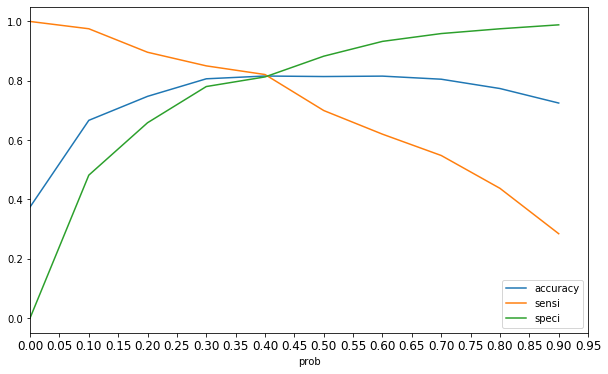

In [1286]:
fig = plt.figure(figsize = (12,8))
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'],figsize=(10,6))
plt.xticks(np.arange(0, 1, step=0.05), size = 12)
plt.show()
fig.savefig('threshold.png')

**0.425** looks like an optimum cutoff point from the above plot.


In [1287]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.425 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,LeadID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.60,6358,1,1,1,1,1,1,1,0,0,0,0,1
1,0,0.06,5658,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.03,5086,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.04,3738,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.25,4711,0,1,1,1,0,0,0,0,0,0,0,0


In [1288]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8107967366776602

In [1289]:
confusion1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
confusion1

array([[3025,  579],
       [ 511, 1646]], dtype=int64)

In [1290]:
TP = confusion1[1,1] # true positive 
TN = confusion1[0,0] # true negatives
FP = confusion1[0,1] # false positives
FN = confusion1[1,0] # false negatives

In [1291]:
# Sensitivity
TP / float(TP+FN)

0.7630968938340288

In [1292]:
# Specificity
TN / float(TN+FP)

0.8393451720310766

In [1293]:
# Calculating false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.1606548279689234


In [1294]:
# Positive predictive value 
print (TP / float(TP+FP))


0.7397752808988765


In [1295]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8554864253393665


### Precision and Recall

Precision = TP / TP + FP

In [1296]:
precision = confusion1[1,1]/(confusion1[0,1]+confusion1[1,1])
precision

0.7397752808988765

Recall = TP / TP + FN

In [1297]:
recall = confusion1[1,1]/(confusion1[1,0]+confusion1[1,1])
recall

0.7630968938340288

Using SKlearn

In [1298]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7397752808988765

In [1299]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7630968938340288

### Precision and Recall Tradeoff

In [1300]:
y_train_pred_final.Converted, y_train_pred_final.final_predicted

(0       0
 1       0
 2       0
 3       0
 4       0
 5       1
 6       0
 7       1
 8       0
 9       0
 10      0
 11      1
 12      0
 13      0
 14      1
 15      1
 16      1
 17      0
 18      0
 19      0
 20      1
 21      0
 22      1
 23      1
 24      0
 25      0
 26      0
 27      1
 28      1
 29      0
 30      0
 31      1
 32      0
 33      0
 34      0
 35      1
 36      0
 37      1
 38      1
 39      1
 40      0
 41      0
 42      0
 43      0
 44      1
 45      0
 46      0
 47      0
 48      0
 49      1
        ..
 5711    0
 5712    0
 5713    0
 5714    0
 5715    1
 5716    1
 5717    0
 5718    0
 5719    1
 5720    0
 5721    0
 5722    0
 5723    0
 5724    0
 5725    1
 5726    0
 5727    0
 5728    1
 5729    1
 5730    0
 5731    0
 5732    0
 5733    1
 5734    1
 5735    1
 5736    0
 5737    0
 5738    0
 5739    1
 5740    0
 5741    0
 5742    0
 5743    0
 5744    1
 5745    0
 5746    1
 5747    1
 5748    0
 5749    0
 5750    1

In [1301]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

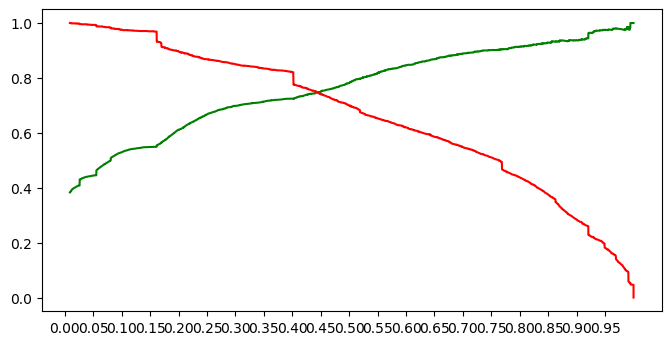

In [1302]:
plt.figure(figsize=(8, 4), dpi=100, facecolor='w', edgecolor='k', frameon='True')
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xticks(np.arange(0, 1, step=0.05))
plt.show()

### Optimal threshold value comes to 0.42 (which is similar to the previous observation)

**Calculate F1 force**

In [1303]:
F1 = 2*(precision*recall)/(precision+recall)
F1

0.7512551346417161

### Predictions on Test data

Transfering data to test dataset using scaler function 

In [1304]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Country_Outside India,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unknown,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_unknown,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Asymmetrique Activity Index_02.Medium,Asymmetrique Activity Index_03.Low,Asymmetrique Activity Index_Unknown,Asymmetrique Profile Index_02.Medium,Asymmetrique Profile Index_03.Low,Asymmetrique Profile Index_Unknown
3987,-1.25,-0.86,-1.25,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2489,-0.29,1.83,-0.64,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
3400,-0.29,-0.66,-0.03,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
5184,0.19,1.93,-0.34,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
6752,-1.25,-0.86,-1.25,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,

In [1305]:
X_test = X_test[cols]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Quality_Low in Relevance,Lead Quality_Worst,Lead Source_NC_EDM,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Specialization_E-COMMERCE,What is your current occupation_Housewife,What is your current occupation_Unknown,What is your current occupation_Working Professional,Last Notable Activity_Unreachable,Asymmetrique Activity Index_03.Low
3987,-0.86,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2489,1.83,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3400,-0.66,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5184,1.93,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
6752,-0.86,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [1306]:
#Adding the constant 
X_test_sm = sm.add_constant(X_test)

In [1307]:
#making predictions on the test data set
y_test_pred = res.predict(X_test_sm)

In [1308]:
y_test_pred[:10]

3987   0.03
2489   0.98
3400   0.19
5184   0.10
6752   0.16
6086   0.17
1968   0.52
346    0.01
7491   0.01
380    0.03
dtype: float64

In [1309]:
#converting into an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
3987,0.03
2489,0.98
3400,0.19
5184,0.10
6752,0.16


In [1310]:
y_test_df = pd.DataFrame(y_test)

In [1311]:
y_test_df['LeadID'] = y_test_df.index

In [1312]:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [1313]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,LeadID,0
0,0,3987,0.03
1,1,2489,0.98
2,0,3400,0.19
3,0,5184,0.10
4,0,6752,0.16


In [1314]:
y_pred_final.shape

(2470, 3)

In [1315]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

In [1316]:
y_pred_final = y_pred_final.reindex(['LeadID','Converted','Conversion_Prob'], axis=1)

In [1317]:
y_pred_final.head()

,LeadID,Converted,Conversion_Prob
0,3987,0,0.03
1,2489,1,0.98
2,3400,0,0.19
3,5184,0,0.10
4,6752,0,0.16


In [1318]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [1319]:
y_pred_final.head()

,LeadID,Converted,Conversion_Prob,final_predicted
0,3987,0,0.03,0
1,2489,1,0.98,1
2,3400,0,0.19,0
3,5184,0,0.10,0
4,6752,0,0.16,0


In [1320]:
#check the overall accuracy.
accuracy_score=metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)
accuracy_score

0.8036437246963563

In [1321]:
confusion_test = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
print(confusion_test)

[[1300  264]
 [ 221  685]]


In [1322]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

In [1323]:
# sensitivity of our logistic regression model
TP / float(TP+FN)
# specificity
TN / float(TN+FP)
# Calculate false postive rate - predicting converion when customer does not have converted
print(FP/ float(TN+FP))
# Positive predictive value 
print (TP / float(TP+FP))
# Negative predictive value
print (TN / float(TN+ FN))


0.16879795396419436
0.7218124341412012
0.8547008547008547


In [1324]:
# Precision
confusion_test[1,1]/(confusion_test[0,1]+confusion_test[1,1])

0.7218124341412012

In [1325]:
# Recall
confusion_test[1,1]/(confusion_test[1,0]+confusion_test[1,1])

0.7560706401766004

In [1326]:
y_pred_final.Converted, y_pred_final.final_predicted

(0       0
 1       1
 2       0
 3       0
 4       0
 5       0
 6       1
 7       0
 8       0
 9       0
 10      0
 11      0
 12      0
 13      0
 14      1
 15      0
 16      1
 17      1
 18      0
 19      0
 20      0
 21      0
 22      1
 23      0
 24      0
 25      1
 26      1
 27      1
 28      0
 29      0
 30      0
 31      0
 32      1
 33      0
 34      1
 35      0
 36      0
 37      1
 38      0
 39      1
 40      0
 41      0
 42      1
 43      0
 44      1
 45      0
 46      0
 47      0
 48      0
 49      0
        ..
 2420    1
 2421    0
 2422    1
 2423    0
 2424    0
 2425    1
 2426    1
 2427    1
 2428    0
 2429    1
 2430    0
 2431    0
 2432    0
 2433    0
 2434    0
 2435    0
 2436    0
 2437    0
 2438    1
 2439    0
 2440    1
 2441    1
 2442    1
 2443    0
 2444    0
 2445    0
 2446    1
 2447    0
 2448    1
 2449    0
 2450    0
 2451    0
 2452    1
 2453    1
 2454    0
 2455    1
 2456    1
 2457    0
 2458    1
 2459    1

In [1327]:
p, r, thresholds = precision_recall_curve(y_pred_final.Converted, y_pred_final.Conversion_Prob)

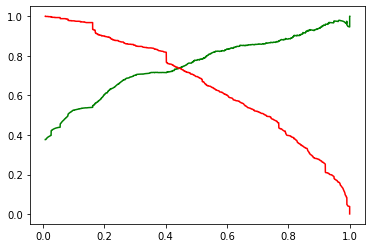

In [1328]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [1329]:
fpr, tpr, thresholds = metrics.roc_curve( y_pred_final.Converted, y_pred_final.Conversion_Prob, drop_intermediate = False )

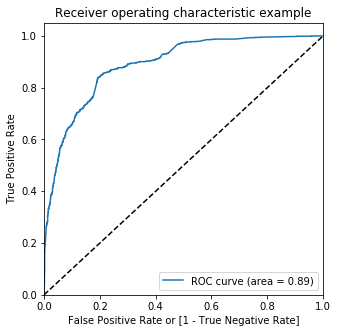

(array([0.        , 0.        , 0.        , ..., 0.99872123, 0.99936061,
        1.        ]),
 array([0.        , 0.00110375, 0.00220751, ..., 1.        , 1.        ,
        1.        ]),
 array([2.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        1.48291334e-03, 1.21637717e-03, 5.42380613e-04]))

In [1330]:
plot_roc(y_pred_final.Converted, y_pred_final.Conversion_Prob)

In [1331]:
y_test_pred = y_test_pred * 100
y_test_pred[:10]

3987    2.60
2489   98.32
3400   18.52
5184   10.27
6752   16.14
6086   16.86
1968   52.38
346     0.88
7491    0.51
380     2.60
dtype: float64

### Selecting the coefficients of the selected features from our final model excluding the intercept

In [1332]:
pd.options.display.float_format = '{:.2f}'.format
new_params = res.params[1:]
new_params

Total Time Spent on Website                             0.83
Lead Origin_Lead Add Form                               2.85
Lead Quality_Low in Relevance                           1.72
Lead Quality_Worst                                     -2.84
Lead Source_NC_EDM                                     25.97
Lead Source_Welingak Website                           22.72
Last Activity_Email Bounced                            -1.87
Last Activity_Had a Phone Conversation                  1.41
Last Activity_Olark Chat Conversation                  -0.79
Last Activity_SMS Sent                                  1.25
Specialization_E-COMMERCE                               0.34
What is your current occupation_Housewife              23.53
What is your current occupation_Unknown                -1.19
What is your current occupation_Working Professional    2.24
Last Notable Activity_Unreachable                       2.19
Asymmetrique Activity Index_03.Low                     -2.25
dtype: float64

In [1333]:
# Getting a relative coeffient value for all the features wrt the feature with the highest coefficient
feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

Total Time Spent on Website                              3.19
Lead Origin_Lead Add Form                               10.96
Lead Quality_Low in Relevance                            6.63
Lead Quality_Worst                                     -10.93
Lead Source_NC_EDM                                     100.00
Lead Source_Welingak Website                            87.48
Last Activity_Email Bounced                             -7.21
Last Activity_Had a Phone Conversation                   5.42
Last Activity_Olark Chat Conversation                   -3.03
Last Activity_SMS Sent                                   4.81
Specialization_E-COMMERCE                                1.31
What is your current occupation_Housewife               90.60
What is your current occupation_Unknown                 -4.58
What is your current occupation_Working Professional     8.61
Last Notable Activity_Unreachable                        8.42
Asymmetrique Activity Index_03.Low                      -8.65
dtype: f

In [1334]:
# Sorting the feature variables based on their relative coefficient values
sorted_idx = np.argsort(feature_importance,kind='quicksort',order='list of str')
sorted_idx

Total Time Spent on Website                              3
Lead Origin_Lead Add Form                               15
Lead Quality_Low in Relevance                            6
Lead Quality_Worst                                      12
Lead Source_NC_EDM                                       8
Lead Source_Welingak Website                            10
Last Activity_Email Bounced                              0
Last Activity_Had a Phone Conversation                   9
Last Activity_Olark Chat Conversation                    7
Last Activity_SMS Sent                                   2
Specialization_E-COMMERCE                               14
What is your current occupation_Housewife               13
What is your current occupation_Unknown                  1
What is your current occupation_Working Professional     5
Last Notable Activity_Unreachable                       11
Asymmetrique Activity Index_03.Low                       4
dtype: int64

<Figure size 864x576 with 0 Axes>

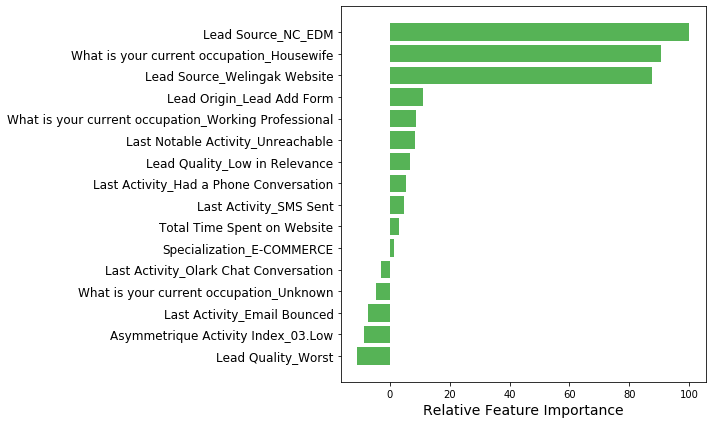

In [1335]:
# Plot showing the feature variables based on their relative coefficient values
# Plotting the scree plot
%matplotlib inline
fig = plt.figure(figsize = (12,8))
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(10,6))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center', color = 'tab:green',alpha=0.8)
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train[cols].columns)[sorted_idx], fontsize=12)
featax.set_xlabel('Relative Feature Importance', fontsize=14)

plt.tight_layout()   
plt.show()
fig.savefig('Question1.png')


In [1336]:
# selecting top 4 features
pd.DataFrame(feature_importance).reset_index().sort_values(by=0,ascending=False).head(4)

,index,0
4,Lead Source_NC_EDM,100.00
11,What is your current occupation_Housewife,90.60
5,Lead Source_Welingak Website,87.48
1,Lead Origin_Lead Add Form,10.96
